# Extreme Learning Machine (AirBnb pricing)

## DATA PREPROCESSING

In [1]:
#Import Library
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\FIKRI\Desktop\Skripsi\Data\listings.csv')
df.head()

c:\users\fikri\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20190409040957,2019-04-11,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,...,f,f,moderate,f,f,3,1,2,0,0.13
1,15400,https://www.airbnb.com/rooms/15400,20190409040957,2019-04-11,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.71
2,17402,https://www.airbnb.com/rooms/17402,20190409040957,2019-04-11,Superb 3-Bed/2 Bath & Wifi: Trendy W1,"Open from June 2018 after a 3-year break, we a...",Ready again from June 2018 for bookings after ...,"Open from June 2018 after a 3-year break, we a...",none,"Location, location, location! You won't find b...",...,f,f,strict_14_with_grace_period,f,f,13,13,0,0,0.40
3,24328,https://www.airbnb.com/rooms/24328,20190409040957,2019-04-11,Battersea 2 bedroom house & parking,"Artist house, high ceiling bedrooms, private p...",- End of terrace two bedroom house close to So...,"Artist house, high ceiling bedrooms, private p...",family,"- Battersea is a quiet family area, easy acces...",...,f,f,moderate,t,t,1,1,0,0,0.90
4,25023,https://www.airbnb.com/rooms/25023,20190409040957,2019-04-11,All-comforts 2-bed flat near Wimbledon tennis,"Large, all comforts, 2-bed flat; first floor; ...",10 mins walk to Southfields tube and Wimbledon...,"Large, all comforts, 2-bed flat; first floor; ...",none,This is a leafy residential area with excellen...,...,f,f,moderate,f,f,1,1,0,0,0.71


In [3]:
df.drop([ 'bed_type', 'experiences_offered', 'has_availability', 'host_has_profile_pic', 'is_business_travel_ready', 'require_guest_phone_verification', 'require_guest_profile_picture', 'requires_license', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'zipcode', 'latitude', 'longitude', 'street', 'neighbourhood', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license', 'jurisdiction_names'], axis=1, inplace=True)

In [4]:
df.isna().sum()

host_since                       248
host_response_time             25699
host_response_rate             25699
host_is_superhost                248
host_listings_count              248
host_identity_verified           248
neighbourhood_cleansed             0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                        147
bedrooms                          37
beds                             134
amenities                          0
price                              0
security_deposit               28329
cleaning_fee                   21082
guests_included                    0
extra_people                       0
minimum_nights                     0
maximum_nights                     0
calendar_updated                   0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
n

In [5]:
df.dropna(subset=['host_since'], inplace=True)

In [6]:
df.isna().sum()

host_since                         0
host_response_time             25451
host_response_rate             25451
host_is_superhost                  0
host_listings_count                0
host_identity_verified             0
neighbourhood_cleansed             0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                        143
bedrooms                          37
beds                             133
amenities                          0
price                              0
security_deposit               28197
cleaning_fee                   20969
guests_included                    0
extra_people                       0
minimum_nights                     0
maximum_nights                     0
calendar_updated                   0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
n

In [7]:
df.drop(['host_since'], axis=1, inplace=True)

In [8]:
pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
df.tail()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
79666,NaN,NaN,f,1.0,f,Camden,Apartment,Private room,1,1.0,1.0,0.0,"{TV,Wifi,Kitchen,""Smoking allowed"",""Pets allow...",$48.00,NaN,NaN,1,$0.00,1,10,today,26,56,77,77,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,flexible,NaN
79667,NaN,NaN,f,1.0,t,Merton,Apartment,Private room,2,1.0,1.0,1.0,"{TV,Wifi,Kitchen,""Free parking on premises"",He...",$79.00,$0.00,$15.00,1,$0.00,1,1125,2 days ago,29,59,81,81,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,flexible,NaN
79668,within an hour,100%,f,6.0,f,Westminster,Apartment,Entire home/apt,2,1.0,1.0,0.0,"{TV,Wifi,Kitchen,Heating,""Smoke detector"",""Car...",$75.00,$100.00,$30.00,1,$0.00,1,1125,today,9,27,44,223,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,flexible,NaN
79669,NaN,NaN,f,1.0,f,Hillingdon,Apartment,Private room,2,1.0,1.0,1.0,"{Wifi,""Free parking on premises"",""Pets allowed...",$50.00,$150.00,$20.00,1,$0.00,5,1125,3 days ago,19,40,43,43,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN
79670,NaN,NaN,f,1.0,f,Wandsworth,Apartment,Private room,2,1.0,1.0,1.0,"{TV,Wifi,Kitchen,Heating,Washer,""Smoke detecto...",$55.00,$200.00,$40.00,1,$0.00,1,1125,yesterday,29,59,89,364,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN


In [9]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

In [10]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.425267
unknown               0.320449
within a few hours    0.134420
within a day          0.098737
a few days or more    0.021127
Name: host_response_time, dtype: float64

In [11]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 25451
Proportion: 32.0%


In [12]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 93.0
Median host response rate: 100.0
Proportion of 100% host response rates: 69.9%


In [13]:
df.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,within a day,60.0,0,4.0,0,Islington,Apartment,Private room,2,1.0,1.0,0.0,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$65.00,$100.00,$15.00,1,$15.00,1,29,4 months ago,10,39,68,343,14,3,2010-08-18,2018-06-17,95.0,9.0,10.0,9.0,10.0,9.0,9.0,0,moderate,0.13
1,within a few hours,100.0,0,1.0,1,Kensington and Chelsea,Apartment,Entire home/apt,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$100.00,$150.00,$50.00,2,$0.00,3,50,5 weeks ago,4,4,4,134,81,0,2009-12-21,2018-03-30,95.0,10.0,10.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0.71
2,within a few hours,62.0,1,16.0,1,Westminster,Apartment,Entire home/apt,6,2.0,3.0,3.0,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",$500.00,$350.00,$65.00,4,$10.00,3,365,yesterday,30,60,89,364,39,14,2011-03-21,2018-10-15,93.0,10.0,9.0,9.0,9.0,10.0,9.0,0,strict_14_with_grace_period,0.40
3,within a day,91.0,1,3.0,1,Wandsworth,Townhouse,Entire home/apt,4,1.5,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",$175.00,$250.00,$70.00,2,$0.00,30,1125,5 weeks ago,12,14,44,319,92,0,2010-11-15,2016-09-07,98.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0.90
4,within an hour,100.0,1,1.0,0,Wandsworth,Apartment,Entire home/apt,4,1.0,2.0,2.0,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",$65.00,$250.00,$50.00,2,$11.00,4,100,5 weeks ago,0,0,14,16,27,5,2016-03-05,2019-03-11,91.0,10.0,9.0,9.0,9.0,9.0,9.0,0,moderate,0.71


In [14]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       37730
unknown    25451
50-89%      7346
90-99%      6519
0-49%       2377
Name: host_response_rate, dtype: int64

In [15]:
df.property_type.value_counts()

Apartment                 53857
House                     16116
Townhouse                  2913
Serviced apartment         2144
Bed and breakfast           890
Condominium                 888
Loft                        718
Guest suite                 323
Guesthouse                  254
Other                       219
Hostel                      214
Boutique hotel              209
Bungalow                    125
Hotel                       112
Cottage                      86
Aparthotel                   62
Villa                        54
Boat                         53
Tiny house                   38
Cabin                        24
Houseboat                    24
Casa particular (Cuba)       20
Camper/RV                    19
Earth house                   9
Hut                           9
Barn                          7
Chalet                        7
Farm stay                     5
Yurt                          4
Nature lodge                  3
Treehouse                     3
Dome hou

In [16]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [17]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [18]:
# Example of amenities listed
df.amenities[:1].values

array(['{TV,"Cable TV",Wifi,Kitchen,"Paid parking off premises","Smoking allowed","Free street parking","Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Outlet covers",Bathtub,"Children’s books and toys","Babysitter recommendations",Crib,"Pack ’n Play/travel crib","Room-darkening shades","Children’s dinnerware","Hot water","Bed linens","Extra pillows and blankets","Ethernet connection","Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Patio or balcony","Luggage dropoff allowed","Long term stays allowed","Step-free access","Wide doorway","Wide clearance to bed","Accessible-height bed","Step-free access","Wide doorway","Bathtub with bath chair","Accessible-height toilet","Host greets you","Handheld shower head","Roll-in shower"}'],
      dtype=object)

In [19]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'Alfresco bathtub',
 'Amazon Echo',
 'Apple TV',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beach view',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Body soap',
 'Breakfast',
 'Breakfast bar',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Ceiling hoist',
 'Central air conditioning',
 'Changing table',
 "Chef's kitchen",
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Dining area',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Double oven',


In [20]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

c:\users\fikri\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [21]:
pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
df.head(2)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,within a day,50-89%,0,4.0,0,Islington,Apartment,Private room,2,1.0,1.0,0.0,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$65.00,$100.00,$15.00,1,$15.00,1,29,4 months ago,10,39,68,343,14,3,2010-08-18,2018-06-17,95.0,9.0,10.0,9.0,10.0,9.0,9.0,0,moderate,0.13,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1,within a few hours,100%,0,1.0,1,Kensington and Chelsea,Apartment,Entire home/apt,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$100.00,$150.00,$50.00,2,$0.00,3,50,5 weeks ago,4,4,4,134,81,0,2009-12-21,2018-03-30,95.0,10.0,10.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0.71,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,39:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,39:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['check_in_24h', 'air_conditioning', 'high_end_electronics', 'bbq', 'nature_and_views', 'gym', 'hot_tub_sauna_or_pool', 'smoking_allowed', 'accessible', 'event_suitable']


In [23]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

In [24]:
df.columns[38:]

Index(['balcony', 'bed_linen', 'breakfast', 'tv', 'coffee_machine',
       'cooking_basics', 'white_goods', 'elevator', 'child_friendly',
       'parking', 'outdoor_space', 'host_greeting', 'internet',
       'long_term_stays', 'pets_allowed', 'private_entrance', 'secure',
       'self_check_in'],
      dtype='object')

In [25]:
pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
df.head(2)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in
0,within a day,50-89%,0,4.0,0,Islington,Apartment,Private room,2,1.0,1.0,0.0,65,$100.00,$15.00,1,$15.00,1,29,4 months ago,10,39,68,343,14,3,2010-08-18,2018-06-17,95.0,9.0,10.0,9.0,10.0,9.0,9.0,0,moderate,0.13,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,within a few hours,100%,0,1.0,1,Kensington and Chelsea,Apartment,Entire home/apt,2,1.0,1.0,1.0,100,$150.00,$50.00,2,$0.00,3,50,5 weeks ago,4,4,4,134,81,0,2009-12-21,2018-03-30,95.0,10.0,10.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0.71,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [26]:
#Convert series with dollar currency (object dtypes) to float dtypes
df.loc[:,['cleaning_fee','extra_people','security_deposit']] = df.loc[:,['cleaning_fee','extra_people','security_deposit']].replace('[\$,]','',regex = True).astype(float)
df.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in
0,within a day,50-89%,0,4.0,0,Islington,Apartment,Private room,2,1.0,1.0,0.0,65,100.0,15.0,1,15.0,1,29,4 months ago,10,39,68,343,14,3,2010-08-18,2018-06-17,95.0,9.0,10.0,9.0,10.0,9.0,9.0,0,moderate,0.13,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,within a few hours,100%,0,1.0,1,Kensington and Chelsea,Apartment,Entire home/apt,2,1.0,1.0,1.0,100,150.0,50.0,2,0.0,3,50,5 weeks ago,4,4,4,134,81,0,2009-12-21,2018-03-30,95.0,10.0,10.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0.71,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,within a few hours,50-89%,1,16.0,1,Westminster,Apartment,Entire home/apt,6,2.0,3.0,3.0,500,350.0,65.0,4,10.0,3,365,yesterday,30,60,89,364,39,14,2011-03-21,2018-10-15,93.0,10.0,9.0,9.0,9.0,10.0,9.0,0,strict_14_with_grace_period,0.40,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,within a day,90-99%,1,3.0,1,Wandsworth,House,Entire home/apt,4,1.5,2.0,2.0,175,250.0,70.0,2,0.0,30,1125,5 weeks ago,12,14,44,319,92,0,2010-11-15,2016-09-07,98.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0.90,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,within an hour,100%,1,1.0,0,Wandsworth,Apartment,Entire home/apt,4,1.0,2.0,2.0,65,250.0,50.0,2,11.0,4,100,5 weeks ago,0,0,14,16,27,5,2016-03-05,2019-03-11,91.0,10.0,9.0,9.0,9.0,9.0,9.0,0,moderate,0.71,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df.drop(['calendar_updated', 'availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

In [28]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 25.4%
Null values in 'review_scores_rating': 27.5%


In [29]:
df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (datetime(2019, 4, 9) - df.first_review).astype('timedelta64[D]')

In [30]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [31]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

In [32]:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (datetime(2019, 4, 9) - df.last_review).astype('timedelta64[D]')

In [33]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [34]:
df.drop(['first_review','last_review'], axis=1, inplace=True)

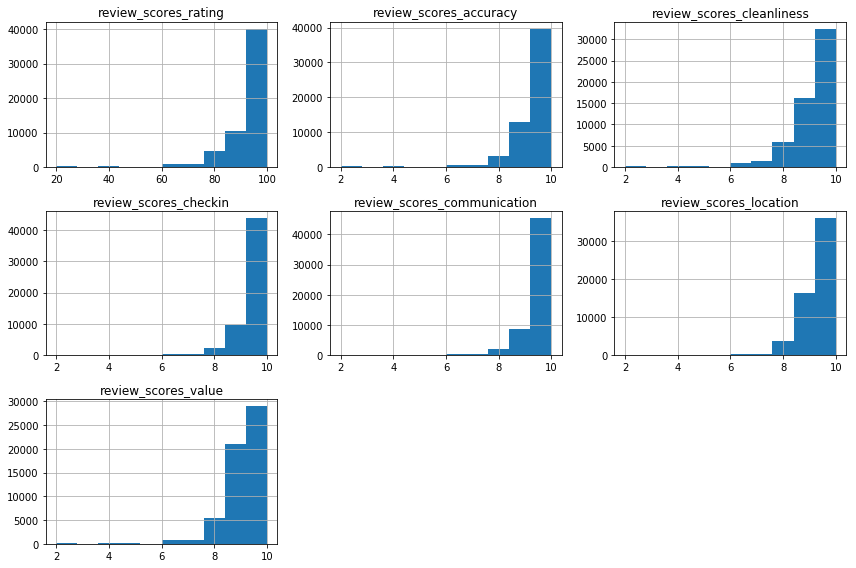

In [35]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [36]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)

'review_scores_rating'

In [37]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [38]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

In [39]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    33601
flexible                       25872
moderate                       19066
super_strict_30                  448
super_strict_60                  419
strict                             9
luxury_moderate                    8
Name: cancellation_policy, dtype: int64

In [40]:
# Replacing categories
df.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate'
    }, inplace=True)

In [41]:
df.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)

In [42]:
df.isna().sum()

host_response_time                 0
host_response_rate                 0
host_is_superhost                  0
host_listings_count                0
host_identity_verified             0
neighbourhood_cleansed             0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
price                              0
security_deposit               28197
cleaning_fee                   20969
guests_included                    0
extra_people                       0
minimum_nights                     0
maximum_nights                     0
availability_90                    0
number_of_reviews                  0
review_scores_rating               0
review_scores_accuracy             0
review_scores_cleanliness          0
review_scores_checkin              0
review_scores_communication        0
review_scores_location             0
r

In [43]:
#Replace the rest NaN values with 0
df = df.fillna(0)
df.isna().sum()

host_response_time             0
host_response_rate             0
host_is_superhost              0
host_listings_count            0
host_identity_verified         0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
price                          0
security_deposit               0
cleaning_fee                   0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
availability_90                0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
cancellation_policy            0
balcony   

In [44]:
transformed_df = pd.get_dummies(df)

In [45]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

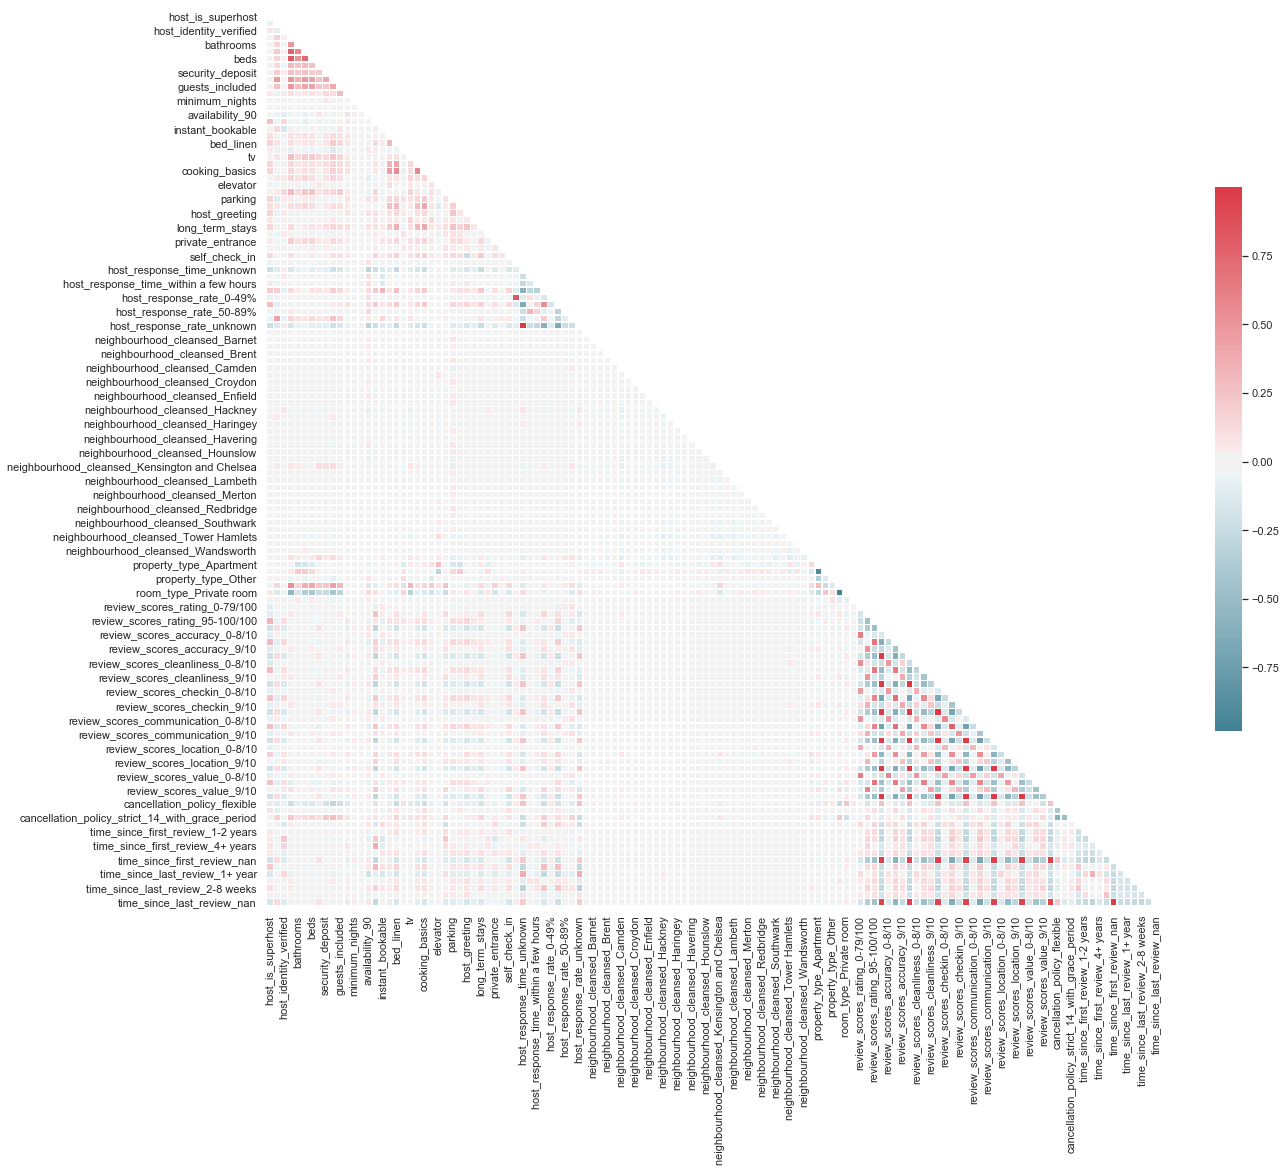

In [46]:
multi_collinearity_heatmap(transformed_df, figsize=(20,20))

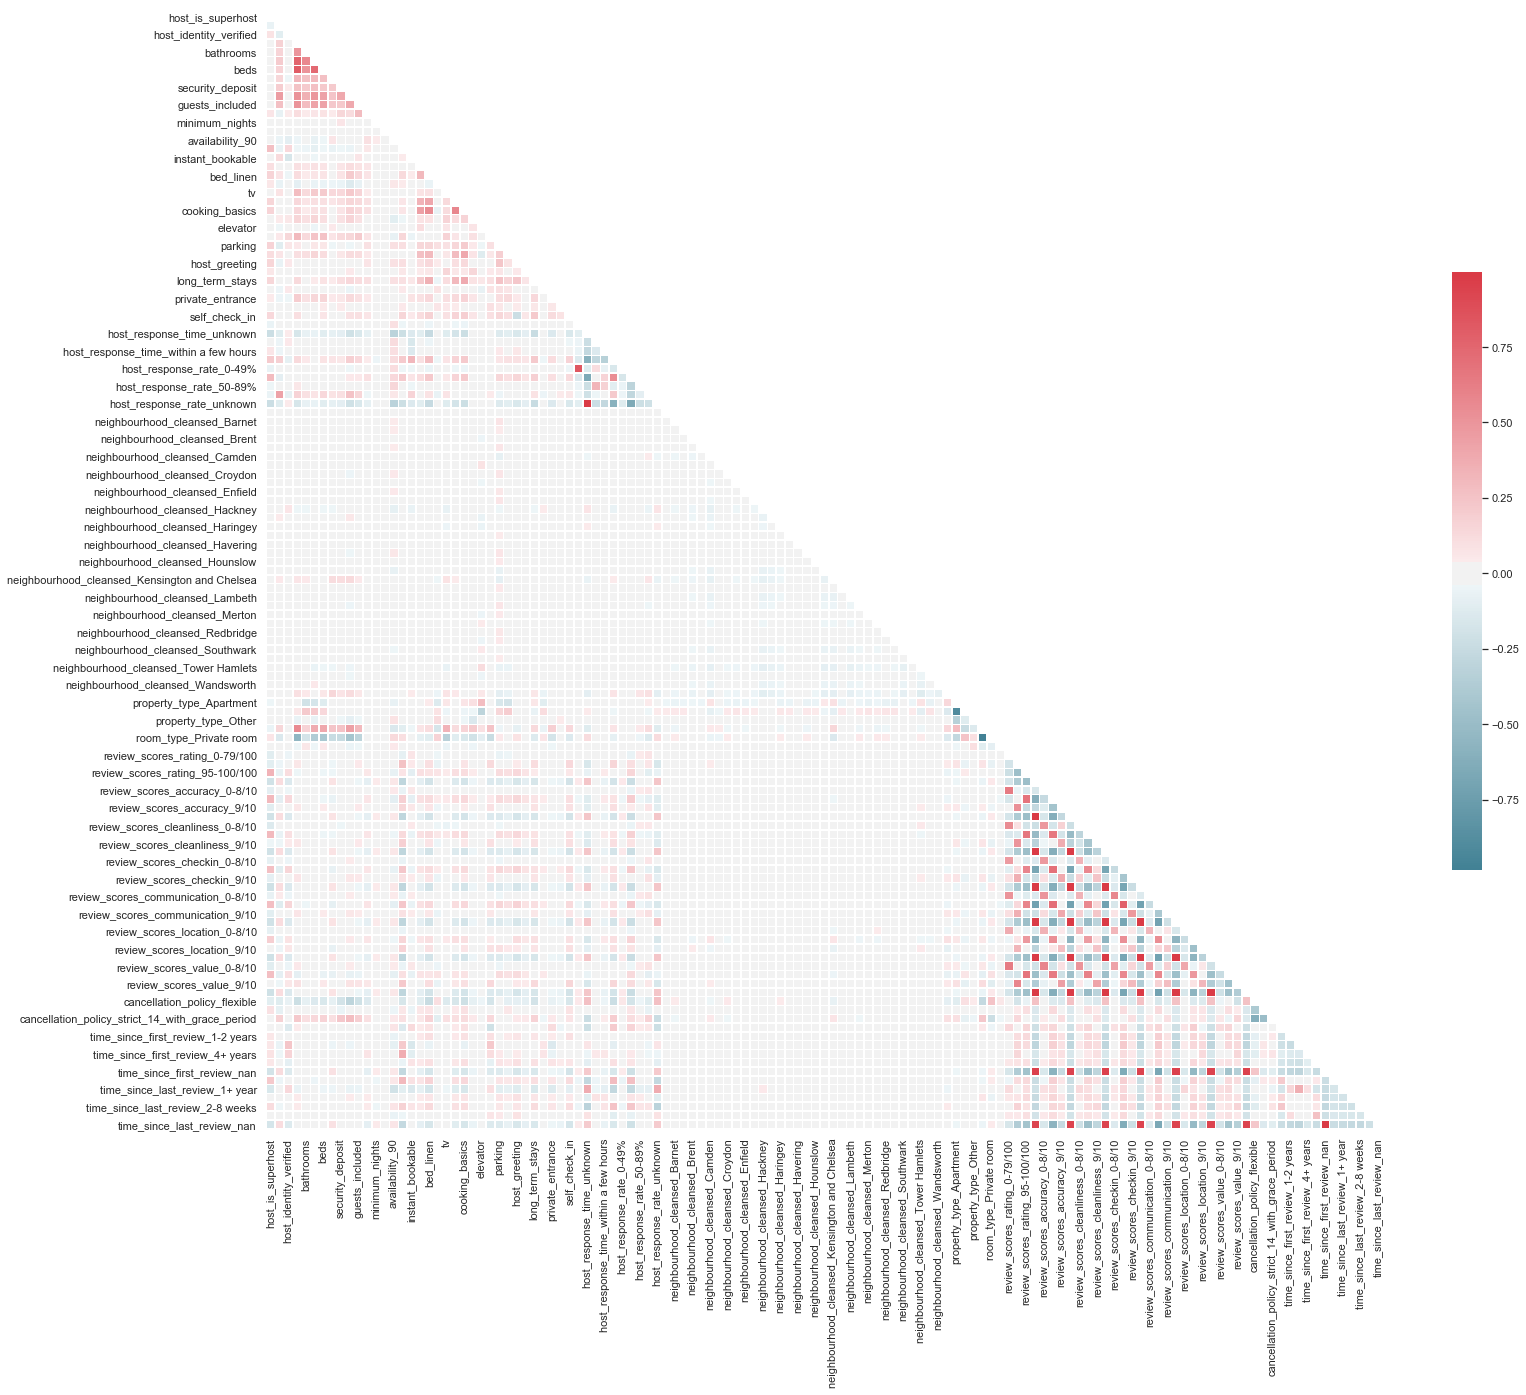

In [47]:
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('borough')]), axis=1), figsize=(25,22))

In [48]:
# Dropping collinear features
to_drop = ['beds',
           'bedrooms',
           'guests_included', 
           'host_response_rate_unknown',
           'host_response_rate_0-49%',
           'property_type_Apartment',
           'room_type_Private room']
to_drop.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('nan')]))

transformed_df.drop(to_drop, axis=1, inplace=True)

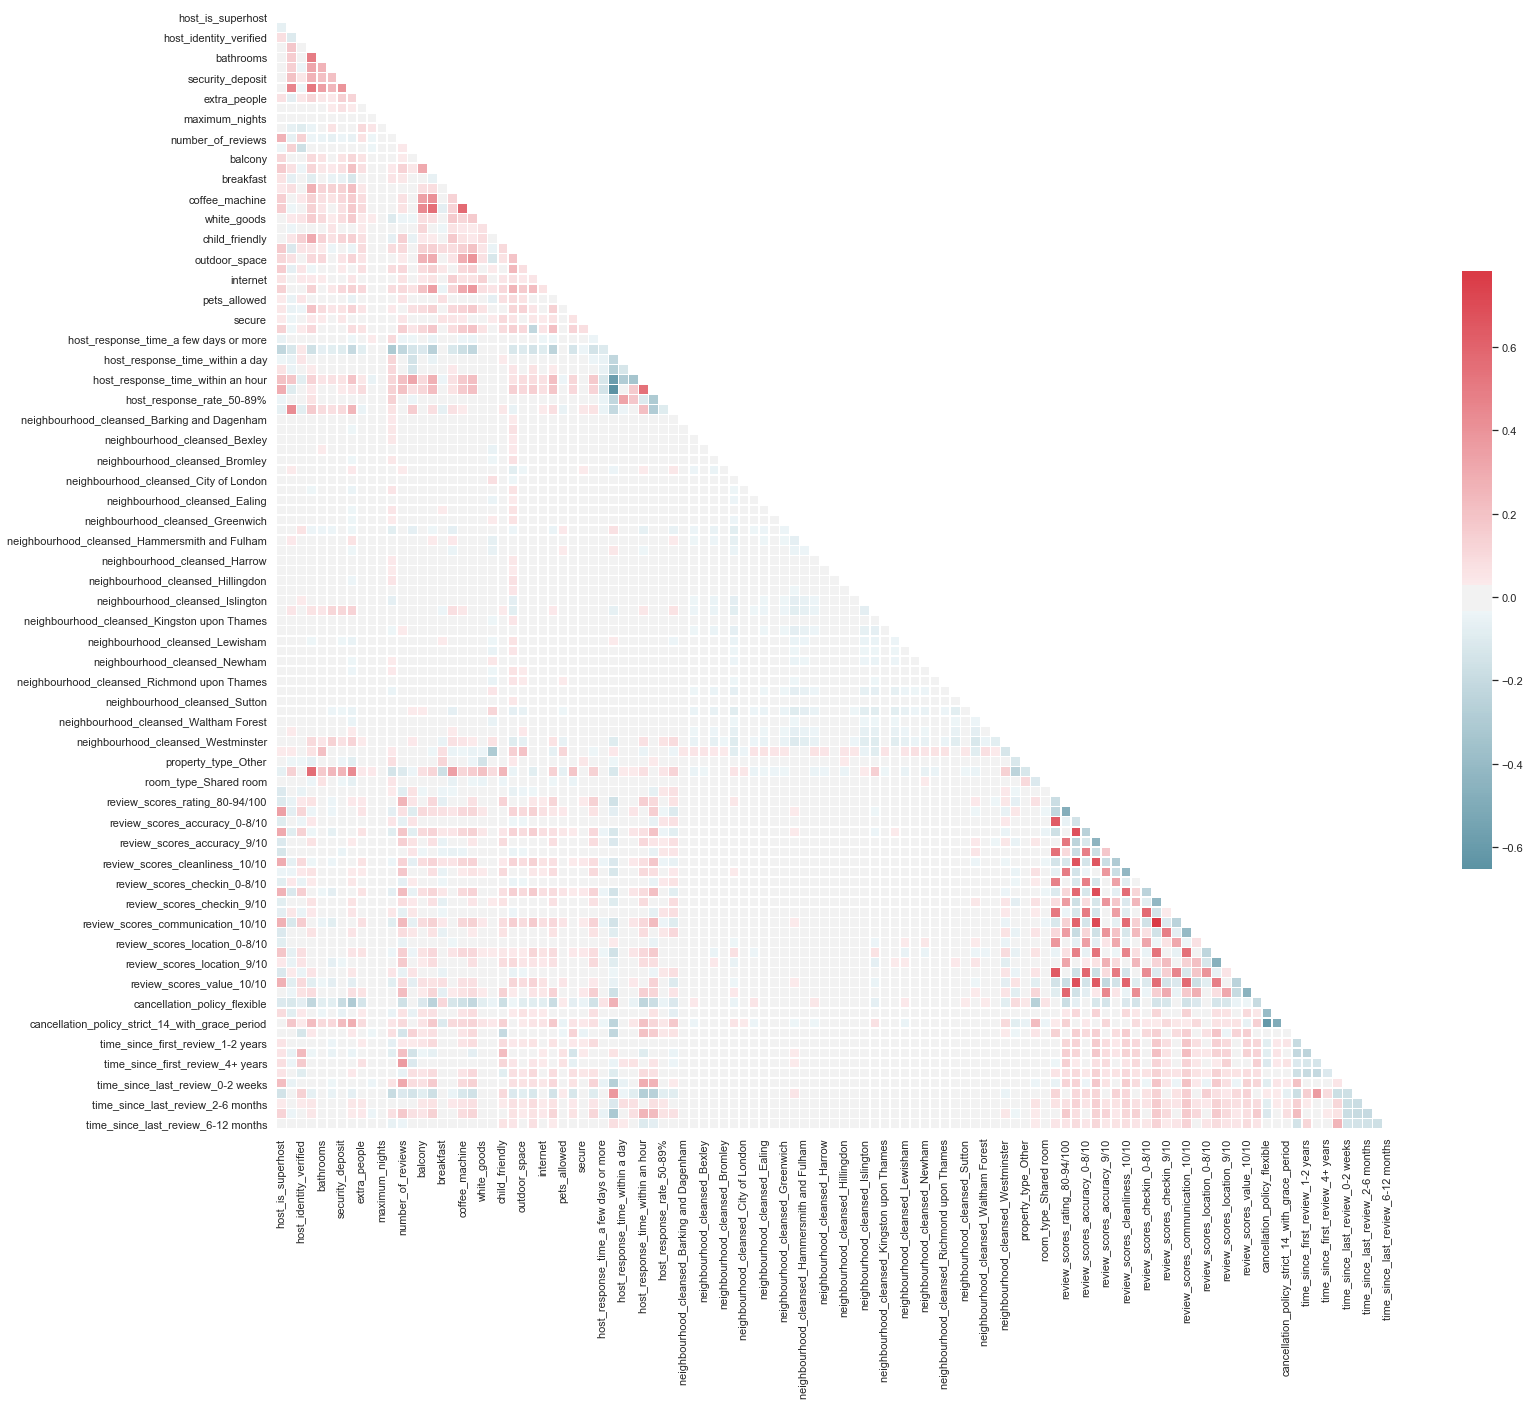

In [49]:
# Final assessment of multi-collinearity
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('borough')]), axis=1), figsize=(25,22))

**Standardising and normalising**

In [50]:
numerical_columns = ['accommodates', 'availability_90', 'bathrooms', 'cleaning_fee', 'extra_people', 'host_listings_count', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price', 'security_deposit']

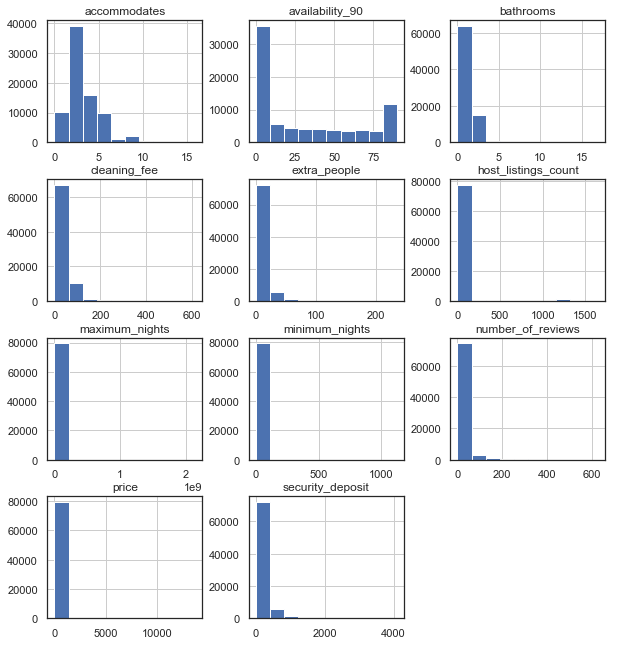

In [51]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [52]:
#Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_90', 'host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

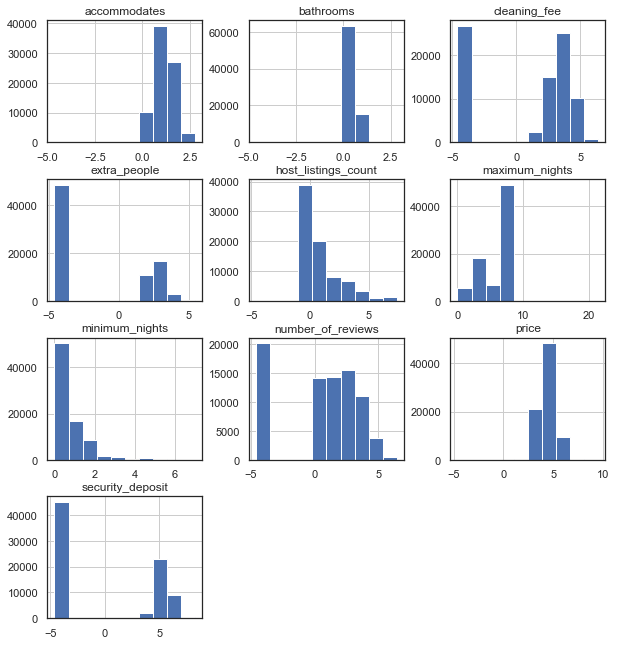

In [53]:
transformed_df[numerical_columns].hist(figsize=(10,11));

# ELM

### Data Preparation for ELM
Referensi : https://github.com/elanpmadani/Extreme-Learning-Machine/blob/master/ELM.ipynb
https://colab.research.google.com/drive/1y3r6pxA0La16ErzWoa6pPKyMFY13SJkd

In [54]:
#Take only N data to prevent memory error
#N=30
#transformed_df = transformed_df.loc[:N]
transformed_df.head()

,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,outdoor_space,host_greeting,internet,long_term_stays,...,review_scores_cleanliness_0-8/10,review_scores_cleanliness_10/10,review_scores_cleanliness_9/10,review_scores_checkin_0-8/10,review_scores_checkin_10/10,review_scores_checkin_9/10,review_scores_communication_0-8/10,review_scores_communication_10/10,review_scores_communication_9/10,review_scores_location_0-8/10,review_scores_location_10/10,review_scores_location_9/10,review_scores_value_0-8/10,review_scores_value_10/10,review_scores_value_9/10,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_last_review_0-2 weeks,time_since_last_review_1+ year,time_since_last_review_2-6 months,time_since_last_review_2-8 weeks,time_since_last_review_6-12 months
0,0,1.386294,0,0.693147,0.000000,4.174387,4.605170,2.708050,2.708050,0.000000,3.367296,68,2.639057,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,0,0.000000,1,0.693147,0.000000,4.605170,5.010635,3.912023,-4.605170,1.098612,3.912023,4,4.394449,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
2,1,2.772589,1,1.791759,0.693147,6.214608,5.857933,4.174387,2.302585,1.098612,5.899897,89,3.663562,0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
3,1,1.098612,1,1.386294,0.405465,5.164786,5.521461,4.248495,-4.605170,3.401197,7.025538,44,4.521789,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
4,1,0.000000,0,1.386294,0.000000,4.174387,5.521461,3.912023,2.397895,1.386294,4.605170,14,3.295837,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0


In [55]:
#Check the order of the dataframe
cols = transformed_df.columns.tolist()
cols

['host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'accommodates',
 'bathrooms',
 'price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_90',
 'number_of_reviews',
 'instant_bookable',
 'balcony',
 'bed_linen',
 'breakfast',
 'tv',
 'coffee_machine',
 'cooking_basics',
 'white_goods',
 'elevator',
 'child_friendly',
 'parking',
 'outdoor_space',
 'host_greeting',
 'internet',
 'long_term_stays',
 'pets_allowed',
 'private_entrance',
 'secure',
 'self_check_in',
 'host_response_time_a few days or more',
 'host_response_time_unknown',
 'host_response_time_within a day',
 'host_response_time_within a few hours',
 'host_response_time_within an hour',
 'host_response_rate_100%',
 'host_response_rate_50-89%',
 'host_response_rate_90-99%',
 'neighbourhood_cleansed_Barking and Dagenham',
 'neighbourhood_cleansed_Barnet',
 'neighbourhood_cleansed_Bexley',
 'neighbourhood_cleansed_Brent',
 'neighbourhood_cleanse

In [56]:
#The target (price) is taken from the dataframe
price_series = transformed_df.loc[:,['price']]
price_series.head()

,price
0,4.174387
1,4.605170
2,6.214608
3,5.164786
4,4.174387


### Split data Training and data Testing

In [57]:
from sklearn.model_selection import train_test_split #sifat library mengharuskan data input dan output harus dipisah karena parameter seperti itu
from sklearn.preprocessing import StandardScaler
import math
#Import library For execution time calculation
import timeit

#time start
start_time = timeit.default_timer()

#Declare Global Variable
testSize = 0.3
h_neuron = 100
X = transformed_df
Y = price_series.to_numpy()

#Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))
X = X.to_numpy()

x_train,x_test,y_train,y_test = train_test_split(X, Y,test_size = testSize, random_state=42)

print(f"training shape : x = {x_train.shape} y ={y_train.shape}")
print(f"testing_shape: x = {x_test.shape}, y = {y_test.shape}")

c:\users\fikri\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\fikri\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


training shape : x = (55596, 111) y =(55596, 1)
testing_shape: x = (23827, 111), y = (23827, 1)


In [58]:
#save the Real price output as pandas df
df_ytrain = pd.DataFrame(y_train)
df_ytest = pd.DataFrame(y_test)

In [59]:
#Make weight matrix
input_length = x_train.shape[1]
weight = np.random.uniform(-1,1,size=[h_neuron,input_length])
weight

array([[-0.46402368, -0.71988588, -0.61557241, ...,  0.85721676,
         0.64057631, -0.16119763],
       [ 0.70394907,  0.49686791, -0.38056654, ..., -0.00445933,
        -0.37637569, -0.60678344],
       [-0.51786343, -0.50724216,  0.32858483, ..., -0.52593755,
        -0.05656938, -0.59483755],
       ...,
       [-0.148449  , -0.62345497,  0.29553454, ..., -0.63715283,
         0.51787392, -0.3976843 ],
       [-0.81525477, -0.75740778, -0.29789082, ..., -0.44088439,
         0.70977215,  0.95459357],
       [ 0.4007957 , -0.26550036,  0.83193668, ...,  0.91376546,
         0.411746  , -0.87733199]])

### Create Activation Function

In [60]:
def sigmoid(Hinit):
    H = 1/(1+np.exp(-Hinit))
    H = np.array(H)
    return H

### Training and Testing Function

In [61]:
#Declare the activation function and get the initial H
def Hinit(X,weight):
    bias = np.random.rand(1)
    weight_t = weight.T
    Hinit = np.dot(X,weight_t) + bias
    return Hinit

In [62]:
#Input to hidden nodes
def hPlus(H):
    H_transpose = H.T
    timed = np.dot(H_transpose,H)
    inverse = np.linalg.inv(timed)
    Hplus = np.dot(inverse,H_transpose)
    return Hplus

In [63]:
def Beta(h_plus,Y_train):
    beta = np.dot(h_plus,Y_train)
    return beta

In [64]:
def get_predict(H,Beta):
    predict = abs(np.dot(H,Beta)) ##Because its impossible for price to be negative value
    return predict

### Function For Plotting Diagram (Predict vs Real Price Diagram)

In [65]:
#Make the price array into pandas dataframe
def concat_result(df_yreal,df_ypredict, train = True):
    
    price_df = pd.concat([df_yreal,df_ypredict],axis = 1)
    
    if(train):
        price_df.columns = ["real_price_training","predicted_price_training"]
    else:
        price_df.columns = ["real_price_testing","predicted_price_testing"]
        
    return price_df

In [66]:
def figure(dfy_real,dfy_predict,train = True):
    fig, ax1 = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(10)

    #Training 
    if(train):
        ax1.set_title('Training Dataset', size = 'large')
    else:
        ax1.set_title('Testing Dataset', size = 'large')

    ax1.scatter(dfy_real,dfy_predict, s=2, alpha = 0.7)
    ax1.plot(list(range(2,8)), list(range(2,8)), color = "black", linestyle = "--")
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')

## Training and Testing Phase

### Trial 1 : SIGMOID

In [67]:
##Training
hinit = Hinit(x_train,weight)
Hsigm = sigmoid(hinit)
hP = hPlus(Hsigm)
beta_sigm = Beta(hP,y_train)
predict_train_sigm = get_predict(Hsigm,beta_sigm)
DFpredict_train_sigm = pd.DataFrame(predict_train_sigm)
TrainTime = timeit.default_timer() - start_time

In [68]:
##Testing
Hinit_test = Hinit(x_test,weight)
H_sigmTest = sigmoid(Hinit_test)
predict_test_sigm = get_predict(H_sigmTest,beta_sigm)
DFpredict_test_sigm = pd.DataFrame(predict_test_sigm)
TestTime = timeit.default_timer() - start_time

In [69]:
#Concat and see result
##Training result:
df_training_sigm = concat_result(df_ytrain,DFpredict_train_sigm,True)
##Testing result:
df_test_sigm = concat_result(df_ytest,DFpredict_test_sigm,False)

In [70]:
df_training_sigm.head(20)

,real_price_training,predicted_price_training
0,5.598422,6.034534
1,4.454347,4.627830
2,3.091042,3.878915
3,4.672829,4.218300
4,4.007333,3.851683
5,5.480639,5.487867
6,5.298317,4.742980
7,5.010635,5.123120
8,4.382027,4.711683
9,5.855072,5.510556


In [71]:
df_test_sigm.head(20)

,real_price_testing,predicted_price_testing
0,3.218876,4.151324
1,4.276666,5.074657
2,5.056246,4.755146
3,5.135798,5.753431
4,5.049856,5.167571
5,5.087596,4.726110
6,5.293305,4.919174
7,3.610918,4.058527
8,3.806662,4.909853
9,5.521461,5.302779


## Plotting Real Price vs Predicted Price

### Figure 1 : Sigmoid

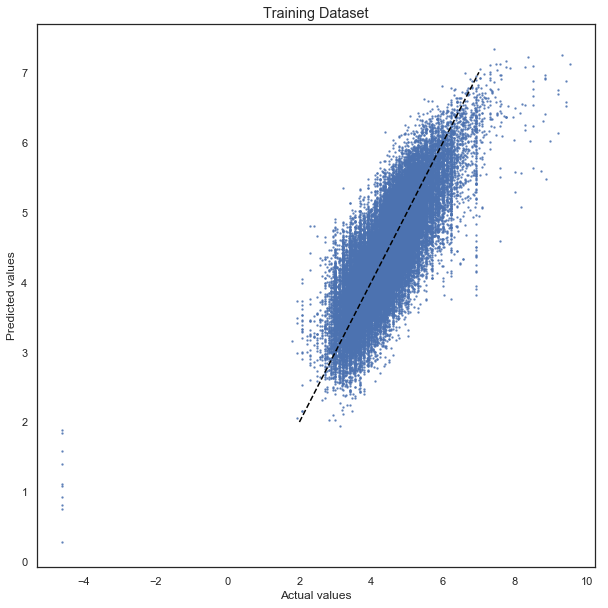

In [72]:
sigm_train_fig = figure(df_ytrain,DFpredict_train_sigm,True)

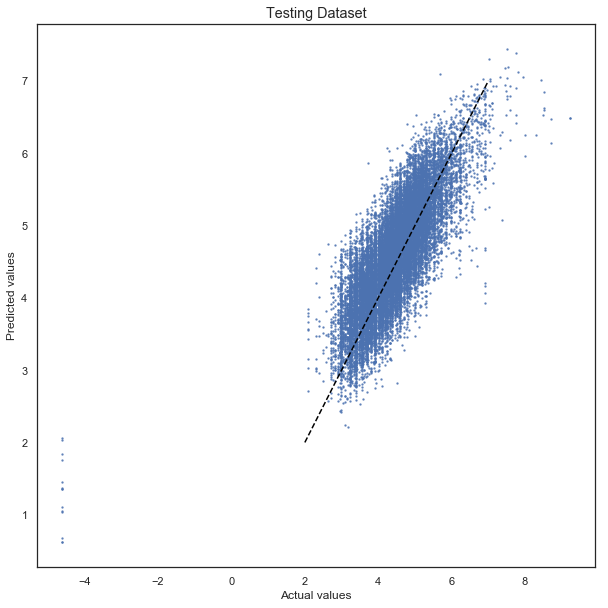

In [73]:
sigm_test_figure = figure(df_ytest,DFpredict_test_sigm,False)

## Evaluation 

### Evaluation Function

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [75]:
def MSE(y_predict,y_real):
    mse = sum((abs(y_predict-y_real))**2)/len(y_real)
    return mse

In [76]:
def RMSE(y_predict,y_real):
    mse = MSE(y_predict,y_real)
    rmse = (mse)**(0.5)
    return rmse

In [77]:
def MSE_baseline(y_predict,y_real):
    mse_b = sum((abs(y_predict-y_real.mean()))**2)/len(y_real)
    return mse_b

In [78]:
def MAPE(y_predict,y_real):
    mape = sum(abs(y_predict-y_real)/y_real)*100/len(y_real)
    return mape

In [79]:
def getEval(y_predict,y_real,time,train = True): #numpy array
    #mse = MSE(y_predict,y_real) #(output_prediksi,nilai_asli)
    #rmse = RMSE(y_predict,y_real)
    #rs = R_squared(y_predict,y_real)
    mape = MAPE(y_predict,y_real)
    mse = mean_squared_error(y_real,y_predict)
    rmse = sqrt(mse)
    if(train):
        print("\nTraining: ")
    else:
        print("\nTesting: ")
    #print(f"MSE : {mse}\nRMSE : {rmse} \nMAPE: {mape} \nExecution time: {time}(s)")
    print(f"MSE : {mse}\nRMSE : {rmse} \nMAPE: {mape}  \nExecution time: {time}(s)")

### Evaluation 1: Sigmoid

In [80]:
sigm_train_eval = getEval(predict_train_sigm,y_train,TrainTime,True)
sigm_test_eval = getEval(predict_test_sigm,y_test,TestTime,False)


Training: 
MSE : 0.22892757134449138
RMSE : 0.4784637617881749 
MAPE: [8.57747681]  
Execution time: 1.9952287999999996(s)

Testing: 
MSE : 0.26790564230899716
RMSE : 0.5175960223079358 
MAPE: [9.29295127]  
Execution time: 2.181292599999999(s)
